In [1]:
import VNA_data_read_local as vdr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [3]:
def loader(baseline_filename, disk_res_filename): 
    folder_path = '/Users/FTS/Desktop/whispering_gallery/data_test/'
    baseline_data = pd.read_csv(folder_path + baseline_filename)
    baseline_data['Complex (decimal)'] = baseline_data['Complex (decimal)'].str.replace(r'[()]', '', regex=True).apply(complex)
    disk_resonance_data = pd.read_csv(folder_path + disk_res_filename)
    disk_resonance_data['Complex (decimal)'] = disk_resonance_data['Complex (decimal)'].str.replace(r'[()]', '', regex=True).apply(complex)
    return baseline_data, disk_resonance_data

'/Users/leayamashiro/whispering_gallery_MAIN/whispering_gallery/data_first_look'

In [7]:
def single_loader(path): 
    #folder_path = '/Users/FTS/Desktop/whispering_gallery/'
    data = pd.read_csv(path)
    data['Complex (decimal)'] = data['Complex (decimal)'].str.replace(r'[()]', '', regex=True).apply(complex)
    return data

In [12]:
BL_3p96_4p92

,Unnamed: 0,Freq (Hz),Complex (decimal)
0,0,3.960000e+09,0.068333-0.027649j
1,1,3.960600e+09,0.065792-0.031734j
2,2,3.961200e+09,0.063641-0.035736j
3,3,3.961800e+09,0.060610-0.039860j
4,4,3.962400e+09,0.057787-0.043652j
...,...,...,...
1596,1596,4.917600e+09,0.055183-0.053951j
1597,1597,4.918200e+09,0.051754-0.057415j
1598,1598,4.918800e+09,0.048080-0.060520j
1599,1599,4.919400e+09,0.043617-0.062523j


In [26]:
BL_3p96_4p92 = single_loader('/Users/leayamashiro/whispering_gallery_MAIN/whispering_gallery/data/BL_Narrow_3.96to4.92GHz_-15to5dB_1601_2025-05-16_16-26-52.txt')
BL_4p92_6p04 = single_loader('/Users/leayamashiro/whispering_gallery_MAIN/whispering_gallery/data/BL_Narrow_4.92to6.04GHz_-15to5dB_1601_2025-05-16_16-28-35.txt')
BL_6p04_7p0 = single_loader('/Users/leayamashiro/whispering_gallery_MAIN/whispering_gallery/data/BL_Narrow_6.04to7GHz_-15to5dB_1601_2025-05-16_16-30-10.txt')
BL_7p0_7p96 = single_loader('/Users/leayamashiro/whispering_gallery_MAIN/whispering_gallery/data/BL_Narrow_7to7.96GHz_-15to5dB_1601_2025-05-16_16-31-21.txt')
BL_7p96_9p08 = single_loader('/Users/leayamashiro/whispering_gallery_MAIN/whispering_gallery/data/BL_Narrow_7.96to9.08GHz_-15to5dB_1601_2025-05-16_16-33-59.txt')
BL_9p08_9p88 = single_loader('/Users/leayamashiro/whispering_gallery_MAIN/whispering_gallery/data/BL_Narrow_9.08to9.88GHz_-15to5dB_1601_2025-05-16_16-35-32.txt')

disk_3p96_4p92 = single_loader('/Users/leayamashiro/whispering_gallery_MAIN/whispering_gallery/data/DISK_Narrow_3.96to4.92GHz_-15to5dB_1601_2025-05-16_16-24-48.txt')
disk_4p92_6p04 = single_loader('/Users/leayamashiro/whispering_gallery_MAIN/whispering_gallery/data/DISK_Narrow_4.92to6.04GHz_-15to5dB_1601_2025-05-16_16-22-45.txt')
disk_6p04_7p0 = single_loader('/Users/leayamashiro/whispering_gallery_MAIN/whispering_gallery/data/DISK_Narrow_6.04to7GHz_-15to5dB_1601_2025-05-16_16-15-24.txt')
disk_7p0_7p96 = single_loader('/Users/leayamashiro/whispering_gallery_MAIN/whispering_gallery/data/DISK_Narrow_7to7.96GHz_-15to5dB_1601_2025-05-16_16-16-55.txt')
disk_7p96_9p08 = single_loader('/Users/leayamashiro/whispering_gallery_MAIN/whispering_gallery/data/DISK_Narrow_7.96to9.08GHz_-15to5dB_1601_2025-05-16_16-18-22.txt')
disk_9p08_9p88 = single_loader('/Users/leayamashiro/whispering_gallery_MAIN/whispering_gallery/data/DISK_Narrow_9.08to9.88GHz_-15to5dB_1601_2025-05-16_16-20-13.txt')

In [27]:
BL_concat = pd.concat([BL_3p96_4p92, BL_4p92_6p04, BL_6p04_7p0, BL_7p0_7p96, BL_7p0_7p96, BL_7p96_9p08, BL_9p08_9p88]).drop_duplicates(subset=['Freq (Hz)'])
disk_concat = pd.concat([disk_3p96_4p92, disk_4p92_6p04, disk_6p04_7p0, disk_7p0_7p96, disk_7p0_7p96, disk_7p96_9p08, disk_9p08_9p88]).drop_duplicates(subset=['Freq (Hz)'])

In [28]:
print(len(BL_concat), len(disk_concat))

9601 9601


[Text(0.5, 0, 'Freq (GHz)'),
 Text(0, 0.5, 'S21 (dB)'),
 Text(0.5, 0, 'Freq (GHz)'),
 Text(0, 0.5, 'S21 (dB)'),
 Text(0.5, 0, 'Freq (GHz)'),
 Text(0, 0.5, 'S21 (dB)')]

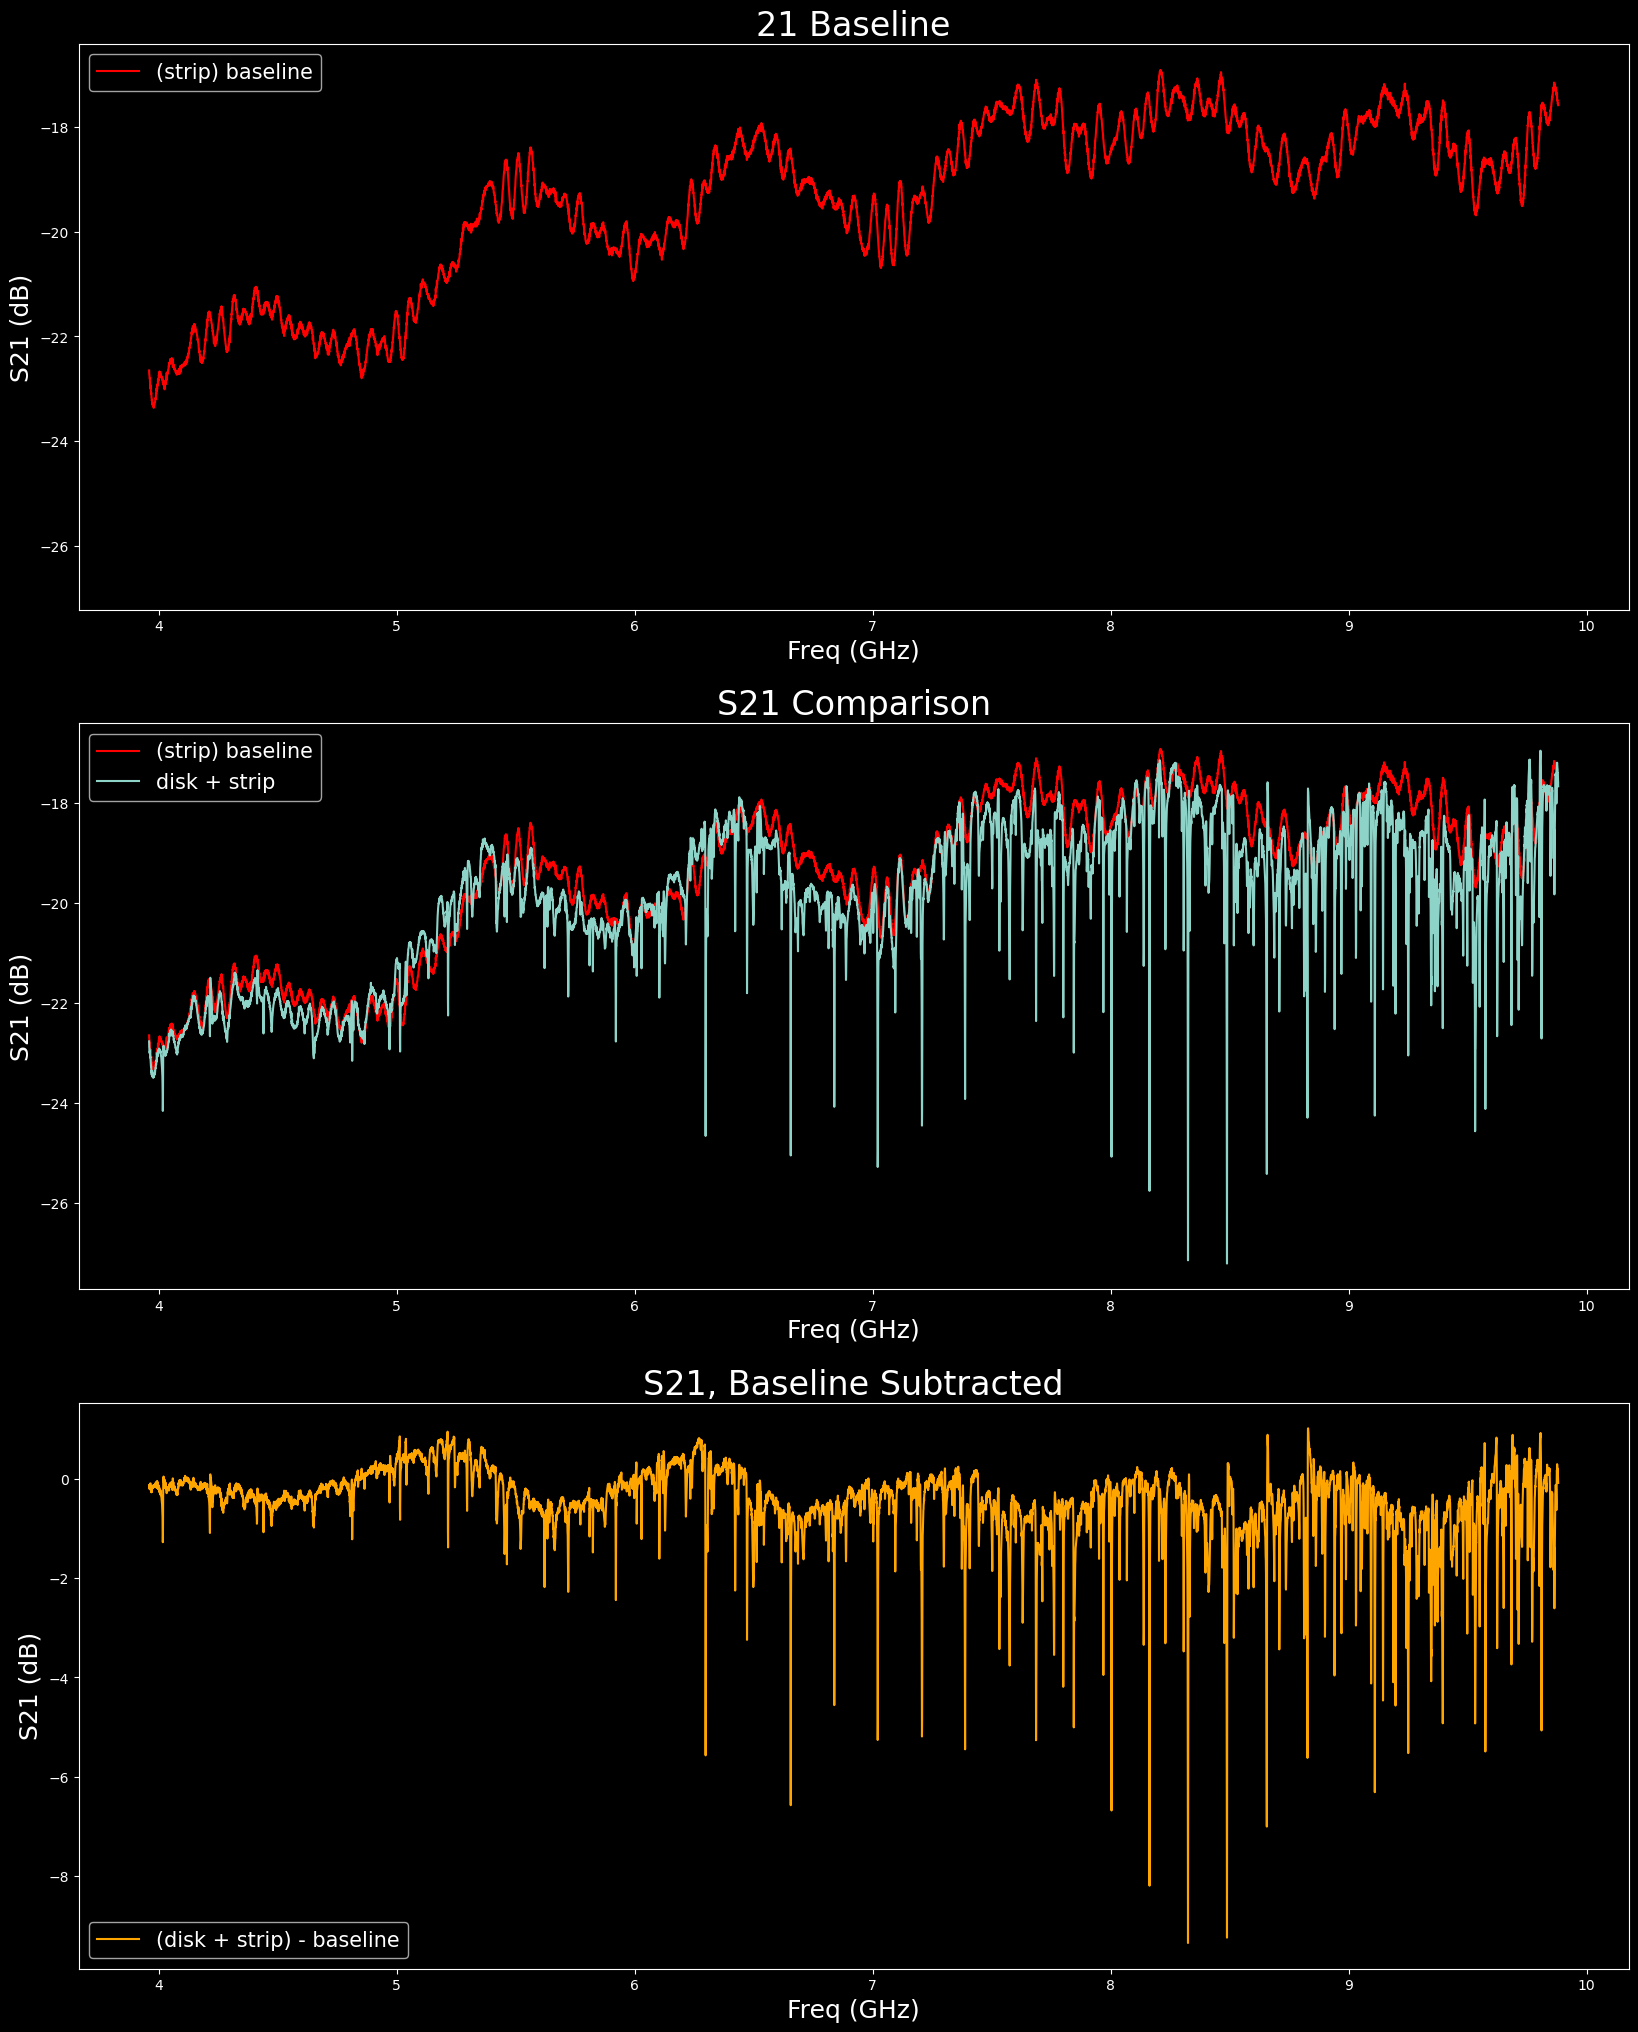

In [29]:
fig, ax = plt.subplots(3, 1, figsize = (20,25))

ax[0].set_title('21 Baseline')
ax[0].plot(1e-9*BL_concat['Freq (Hz)'], 20*np.log10(np.abs(BL_concat['Complex (decimal)'])), label = '(strip) baseline', color = 'red')
ax[0].legend()
ax[0].set_ylim(np.min(20*np.log10(np.abs(disk_concat['Complex (decimal)']))), np.max(20*np.log10(np.abs(BL_concat['Complex (decimal)'])))+0.5)

ax[1].set_title('S21 Comparison')
ax[1].plot(1e-9*BL_concat['Freq (Hz)'], 20*np.log10(np.abs(BL_concat['Complex (decimal)'])), label = '(strip) baseline', color = 'red')
ax[1].plot(1e-9*disk_concat['Freq (Hz)'], 20*np.log10(np.abs(disk_concat['Complex (decimal)'])), label = 'disk + strip')
ax[1].legend()
            
ax[2].set_title('S21, Baseline Subtracted')
ax[2].plot(1e-9*BL_concat['Freq (Hz)'], 
            20*np.log10(np.abs(disk_concat['Complex (decimal)']))-20*np.log10(np.abs(BL_concat['Complex (decimal)'])), 
            label = '(disk + strip) - baseline', color = 'orange')
ax[2].legend()
plt.setp(ax, xlabel = 'Freq (GHz)', ylabel = 'S21 (dB)')

### Looking for lowest mode TE

(Only have the 2 GHz step data for <3.96)

In [70]:
BL_2to4, disk_2to4 = vdr.loader('BL_Narrow_2GHz_to_4GHz_-15to5dB_1601_2025-05-16_15-40-08.txt', 
                                'DISK_Narrow_2GHz_to_4.08GHz_-15to5dB_1601_2025-05-16_15-55-17.txt', 
                                'data/narrow_2GHz_step')
BL_4to6, disk_4to6 = vdr.loader('BL_Narrow_4GHz_to_6GHz_-15to5dB_1601_2025-05-16_15-42-10.txt', 
                                'DISK_Narrow_4GHz_to_6.08GHz_-15to5dB_1601_2025-05-16_15-57-05.txt', 
                                'data/narrow_2GHz_step')

In [32]:
BL_2to4

,Unnamed: 0,Freq (Hz),Complex (decimal)
0,0,2.000000e+09,0.025759-0.031193j
1,1,2.001300e+09,0.021189-0.034304j
2,2,2.002600e+09,0.016325-0.036493j
3,3,2.003900e+09,0.011009-0.038549j
4,4,2.005200e+09,0.005873-0.039433j
...,...,...,...
1596,1596,4.074800e+09,0.073124+0.010353j
1597,1597,4.076100e+09,0.073822+0.000160j
1598,1598,4.077400e+09,0.073402-0.009892j
1599,1599,4.078700e+09,0.071175-0.019493j


In [36]:
BL_2p7_4 = BL_2to4[BL_2to4['Freq (Hz)']>2.75e+09]
BL_2p7_4
disk_2p7_4 = disk_2to4[disk_2to4['Freq (Hz)']>2.75e+09]

In [45]:
max(disk_2p7_4['Freq (Hz)'])

4080000000.0

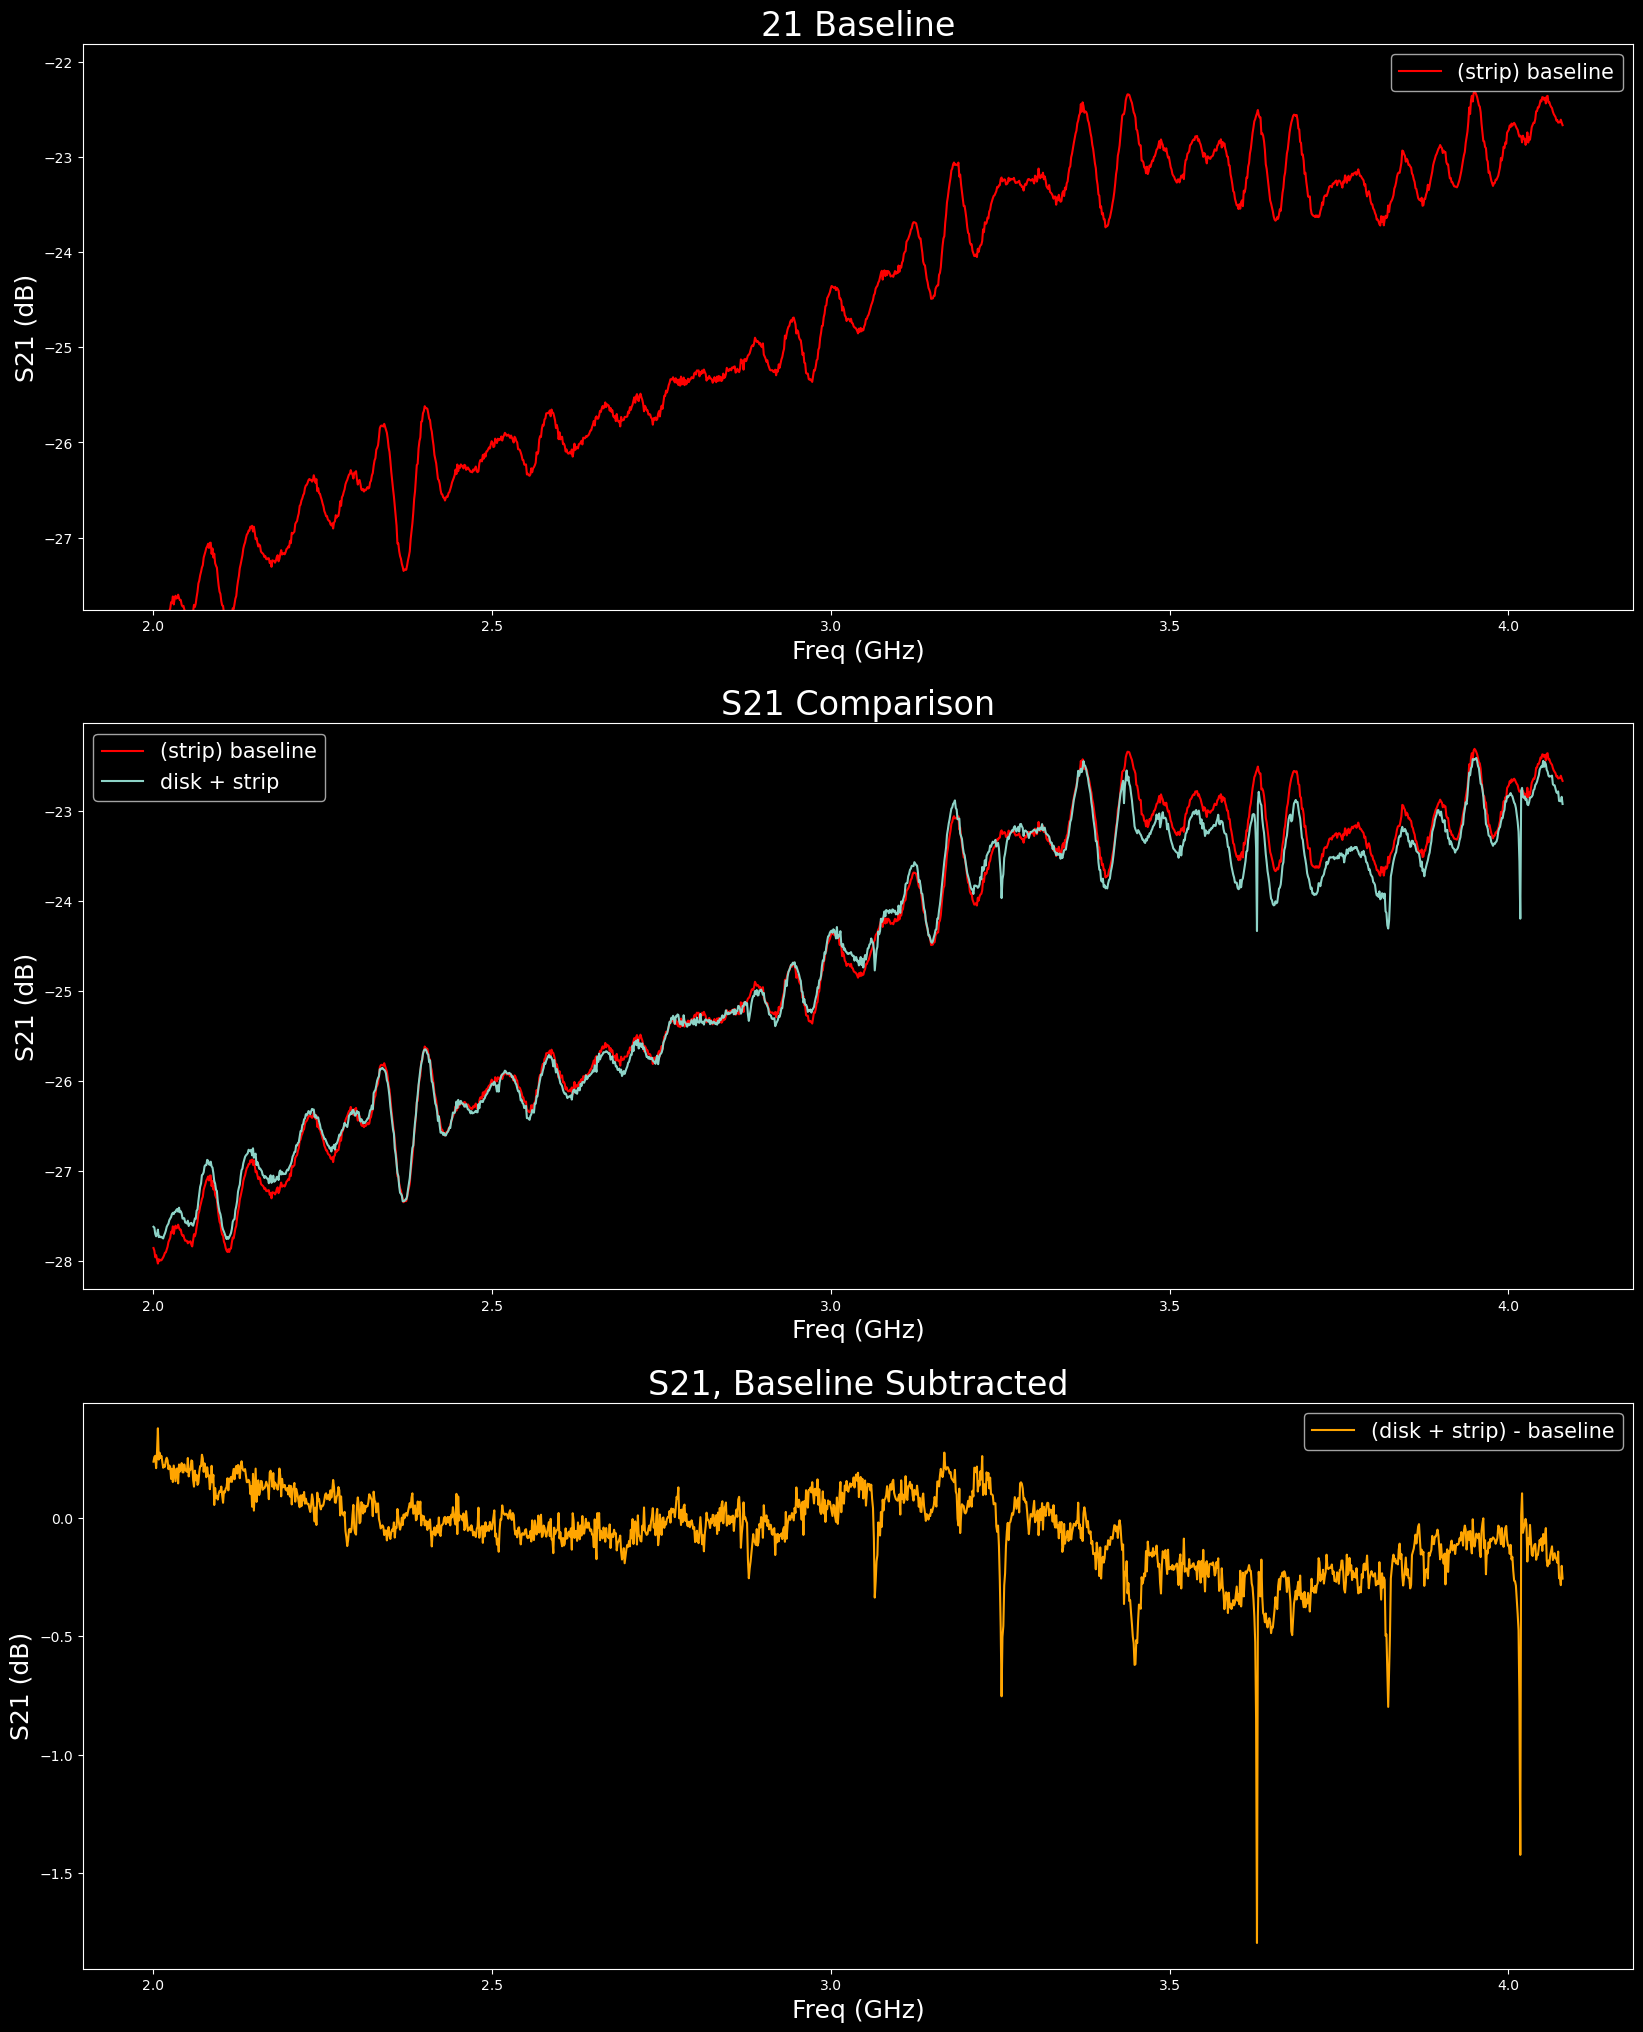

In [33]:
BL_2to4_plotter, disk_2to4_plotter = vdr.loader_plotter('BL_Narrow_2GHz_to_4GHz_-15to5dB_1601_2025-05-16_15-40-08.txt', 
                                'DISK_Narrow_2GHz_to_4.08GHz_-15to5dB_1601_2025-05-16_15-55-17.txt', 
                                'data/narrow_2GHz_step')

[Text(0.5, 0, 'Freq (GHz)'),
 Text(0, 0.5, 'S21 (dB)'),
 Text(0.5, 0, 'Freq (GHz)'),
 Text(0, 0.5, 'S21 (dB)'),
 Text(0.5, 0, 'Freq (GHz)'),
 Text(0, 0.5, 'S21 (dB)')]

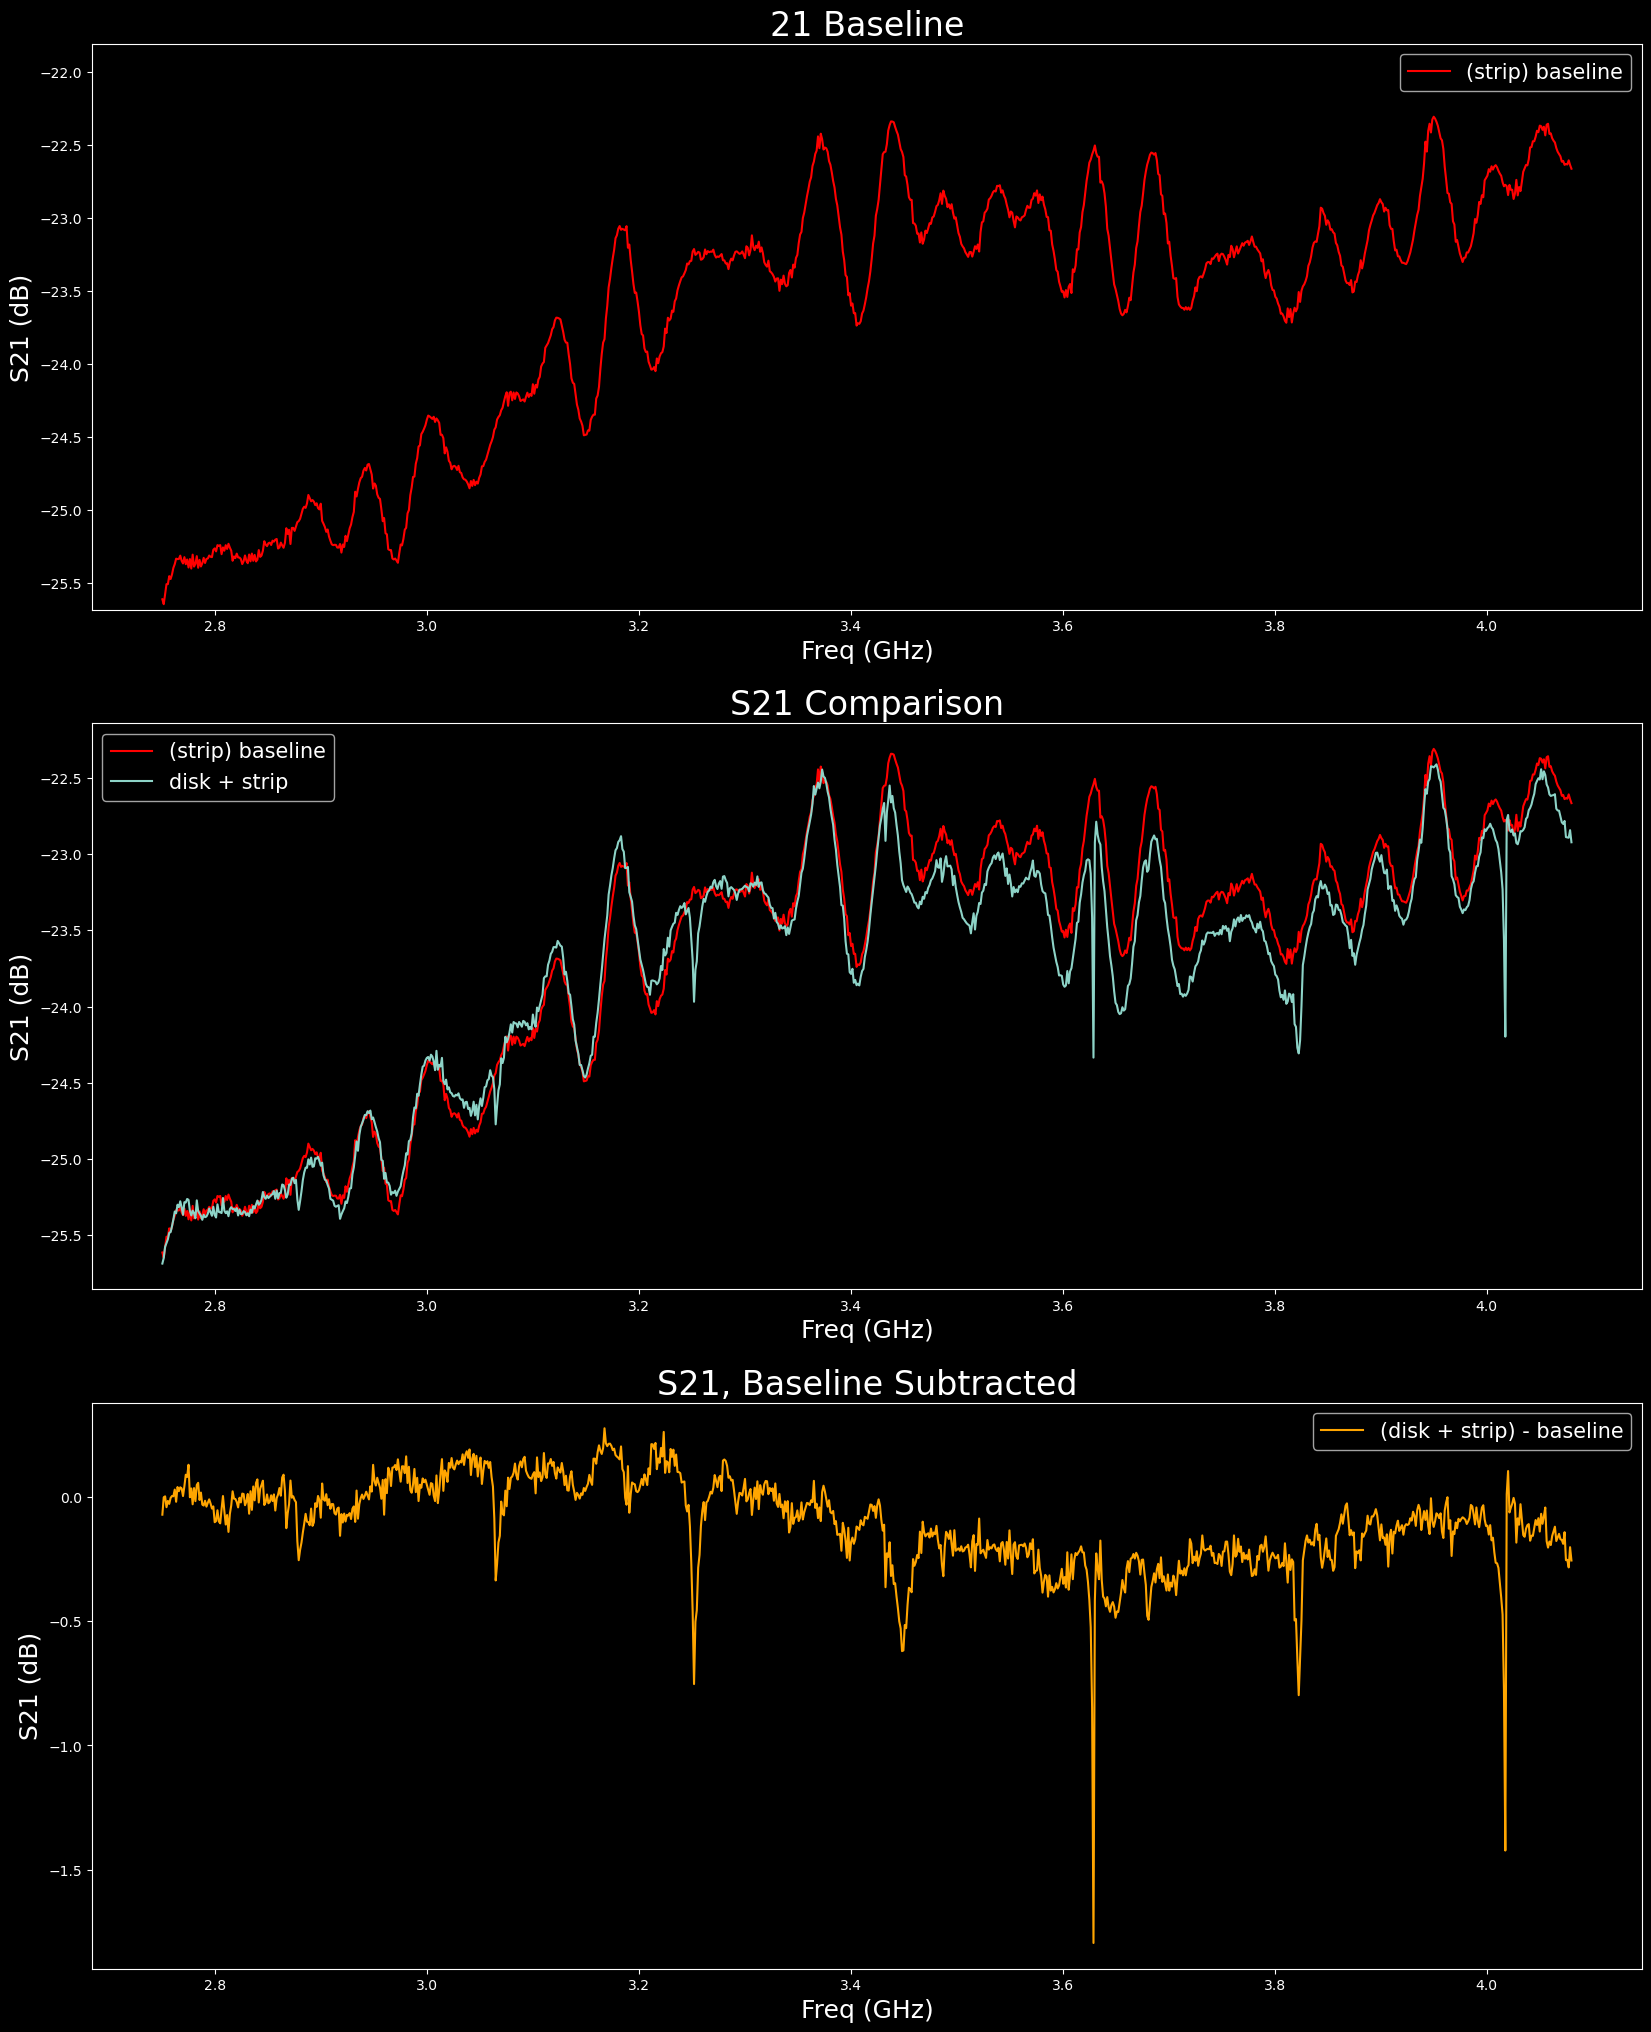

In [37]:
fig, ax = plt.subplots(3, 1, figsize = (20,25))
    
ax[0].set_title('21 Baseline')
ax[0].plot(1e-9*BL_2p7_4['Freq (Hz)'], 20*np.log10(np.abs(BL_2p7_4['Complex (decimal)'])), label = '(strip) baseline', color = 'red')
ax[0].legend()
ax[0].set_ylim(np.min(20*np.log10(np.abs(disk_2p7_4['Complex (decimal)']))), np.max(20*np.log10(np.abs(BL_2p7_4['Complex (decimal)'])))+0.5)

ax[1].set_title('S21 Comparison')
ax[1].plot(1e-9*BL_2p7_4['Freq (Hz)'], 20*np.log10(np.abs(BL_2p7_4['Complex (decimal)'])), label = '(strip) baseline', color = 'red')
ax[1].plot(1e-9*disk_2p7_4['Freq (Hz)'], 20*np.log10(np.abs(disk_2p7_4['Complex (decimal)'])), label = 'disk + strip')
ax[1].legend()
            
ax[2].set_title('S21, Baseline Subtracted')
ax[2].plot(1e-9*BL_2p7_4['Freq (Hz)'], 
            20*np.log10(np.abs(disk_2p7_4['Complex (decimal)']))-20*np.log10(np.abs(BL_2p7_4['Complex (decimal)'])), 
            label = '(disk + strip) - baseline', color = 'orange')
ax[2].legend()
plt.setp(ax, xlabel = 'Freq (GHz)', ylabel = 'S21 (dB)')

In [71]:
BL_concat1 = pd.concat([BL_2to4, BL_4to6]).drop_duplicates(subset=['Freq (Hz)'])
disk_concat1 = pd.concat([disk_2to4, disk_4to6]).drop_duplicates(subset=['Freq (Hz)'])

In [72]:
print(max(BL_concat1['Freq (Hz)']), max(disk_concat1['Freq (Hz)']))

6080000000.0 6080000000.0


In [79]:
BL_sim_compat = BL_concat1[(BL_concat1['Freq (Hz)']>2.5e+09) & (BL_concat1['Freq (Hz)']<4.9e+09)]
disk_sim_compat = disk_concat1[(disk_concat1['Freq (Hz)']>2.5e+09) & (disk_concat1['Freq (Hz)']<4.9e+09)]

### Bringing in the quality factor simulation data for this range: 

In [38]:
Efreq_cf2p5 = pd.read_csv('/Users/leayamashiro/AliCPT/whispering_gallery/wgm_code/eigenCSV/alumina_eigenfreqs_center2p5_n109.csv', skiprows=4)
Efreq_cf3p5 = pd.read_csv('/Users/leayamashiro/AliCPT/whispering_gallery/wgm_code/eigenCSV/alumina_eigenfreqs_center3p5_n109.csv', skiprows=4)
Efreq_cf4p0 = pd.read_csv('/Users/leayamashiro/AliCPT/whispering_gallery/wgm_code/eigenCSV/alumina_eigenfreqs_center4_n109.csv', skiprows=4)
Efreq_cf4p5 = pd.read_csv('/Users/leayamashiro/AliCPT/whispering_gallery/wgm_code/eigenCSV/alumina_eigenfreqs_centerfreq4p5GHz_n109.csv', skiprows=4)

In [39]:
def fix_csv(file): 
    
    # Define a function to convert string representation to complex number
    def convert_to_j(x):
        if isinstance(x, str):  # Only try to convert if it's a string
            try:
                return x.replace('i', 'j')  # Replace 'i' with 'j' for Python compatibility
            except ValueError:
                return None  # Return None for invalid values (if any)
        else:
            return x  # If it's already a number (e.g., float), return it unchanged
        
    file['% Eigenfrequency (GHz)'] = file['% Eigenfrequency (GHz)'].apply(convert_to_j) # convert i to j for column 
    file['% Eigenfrequency (GHz)'] = file['% Eigenfrequency (GHz)'].apply(complex)
    file[['Frequency (GHz)', 'Quality factor (1)']] = file[['Frequency (GHz)', 'Quality factor (1)']].apply(pd.to_numeric, errors='coerce')

    file['Eigenfreq_Real'] = file['% Eigenfrequency (GHz)'].apply(lambda x: x.real)
    file['Eigenfreq_Imag'] = file['% Eigenfrequency (GHz)'].apply(lambda x: x.imag)

    return file

    

In [40]:
E_cf2p5 = fix_csv(Efreq_cf2p5)
E_cf3p5 = fix_csv(Efreq_cf3p5)
E_cf4p0 = fix_csv(Efreq_cf4p0)
E_cf4p5 = fix_csv(Efreq_cf4p5)

In [55]:
eigens_combined_orig = pd.concat([E_cf2p5, E_cf3p5, E_cf4p0, E_cf4p5], ignore_index=True)

In [56]:
eigens_combined = pd.concat([E_cf2p5, E_cf3p5, E_cf4p0, E_cf4p5], ignore_index=True).drop_duplicates(subset=['Frequency (GHz)'])

In [58]:
eigens_combined = eigens_combined[]

,% Eigenfrequency (GHz),Frequency (GHz),Quality factor (1),Eigenfreq_Real,Eigenfreq_Imag
0,1.774520+0.185648j,1.774520,4.779254,1.774520,0.185648
1,1.774545+0.185653j,1.774545,4.779191,1.774545,0.185653
2,1.787684+0.277842j,1.787684,3.217086,1.787684,0.277842
3,1.808136+0.051100j,1.808136,17.691991,1.808136,0.051100
4,1.808156+0.051104j,1.808156,17.690805,1.808156,0.051104
...,...,...,...,...,...
867,4.885231+0.000019j,4.885231,128349.817252,4.885231,0.000019
868,4.887611+0.000019j,4.887611,125339.256085,4.887611,0.000019
869,4.890677+0.000022j,4.890677,109926.110678,4.890677,0.000022
870,4.892313+0.000024j,4.892313,101142.183646,4.892313,0.000024


Text(0.5, 1.0, 'Quality Factor vs. Frequency')

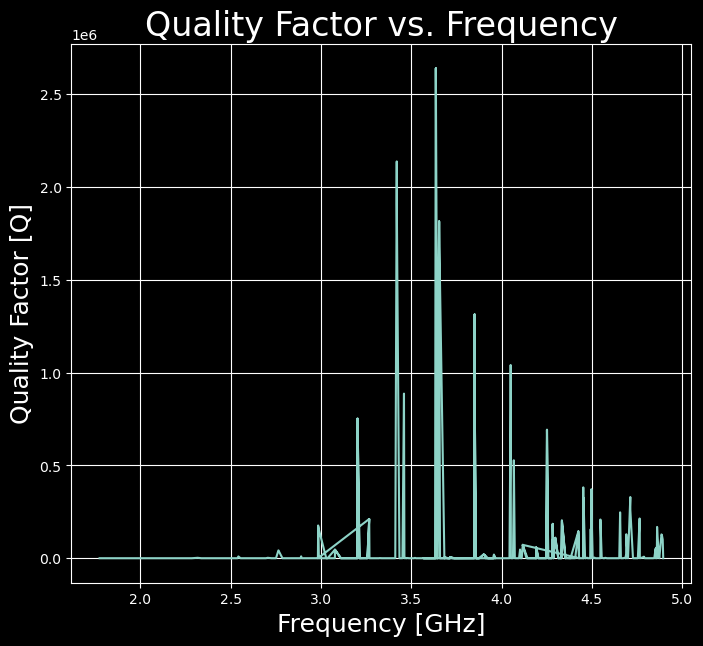

In [42]:
plt.figure(figsize = (8,7))
plt.plot(eigens_combined['Frequency (GHz)'], eigens_combined['Quality factor (1)'])
plt.xlabel('Frequency [GHz]')
plt.ylabel('Quality Factor [Q]')
plt.grid(True)
plt.title('Quality Factor vs. Frequency')

In [73]:
max(eigens_combined['Frequency (GHz)'])

4.895147065016383

In [77]:
eigen_sim = eigens_combined[(eigens_combined['Frequency (GHz)']>2.5) & (eigens_combined['Frequency (GHz)']<4.9)]
eigen_sim

,% Eigenfrequency (GHz),Frequency (GHz),Quality factor (1),Eigenfreq_Real,Eigenfreq_Imag
71,2.505003+0.367487j,2.505003,3.408284,2.505003,0.367487
72,2.505025+0.367540j,2.505025,3.407824,2.505025,0.367540
73,2.505138+0.367378j,2.505138,3.409485,2.505138,0.367378
74,2.505146+0.367309j,2.505146,3.410133,2.505146,0.367309
75,2.510685+0.610261j,2.510685,2.057059,2.510685,0.610261
...,...,...,...,...,...
867,4.885231+0.000019j,4.885231,128349.817252,4.885231,0.000019
868,4.887611+0.000019j,4.887611,125339.256085,4.887611,0.000019
869,4.890677+0.000022j,4.890677,109926.110678,4.890677,0.000022
870,4.892313+0.000024j,4.892313,101142.183646,4.892313,0.000024


In [89]:
S21_subtracted = 20*np.log10(np.abs(disk_sim_compat['Complex (decimal)']))-20*np.log10(np.abs(BL_sim_compat['Complex (decimal)']))
freqs_compat = 1e-9*BL_sim_compat['Freq (Hz)']

### try plotting both

In [86]:
%matplotlib qt

In [87]:
plt.figure(figsize=(10,6))

plt.title('S21 vs Simulated Q-Factor')
plt.plot(1e-9*BL_sim_compat['Freq (Hz)'], 
            20*np.log10(np.abs(disk_sim_compat['Complex (decimal)']))-20*np.log10(np.abs(BL_sim_compat['Complex (decimal)'])), 
            label = 'Baseline-Subtracted S21', color = 'orange')

plt.plot(eigen_sim['Frequency (GHz)'], eigen_sim['Quality factor (1)']/1e6 - 5, label = 'Q-Factor (units arb)', color = 'red')
plt.legend(loc='center left', fontsize =11)
plt.xlabel('Freq (GHz)')
plt.ylabel('S21 (dB)')

Text(0, 0.5, 'S21 (dB)')

Okay wow so. It lines up pretty well with the highest-Q... and we see dip broadening and Q-peak alignment spreading on either side of the ~3.6 GHz, almost symmetrically. 

#### Further visual inspection about each of the dips...

In [90]:
fig, ax = plt.subplots(5, 1, figsize = (6, 26))

ax[0].plot(freqs_compat, S21_subtracted)
ax[0].set_xlim(3.2, 3.35)

ax[1].plot(freqs_compat, S21_subtracted)
ax[1].set_xlim(3.4, 3.55)

ax[2].plot(freqs_compat, S21_subtracted)
ax[2].set_xlim(3.55, 3.7)

ax[3].plot(freqs_compat, S21_subtracted)
ax[3].set_xlim(3.75, 3.9)

ax[4].plot(freqs_compat, S21_subtracted)
ax[4].set_xlim(3.95, 4.1)



(3.95, 4.1)